(2000, 2)
(2000,)


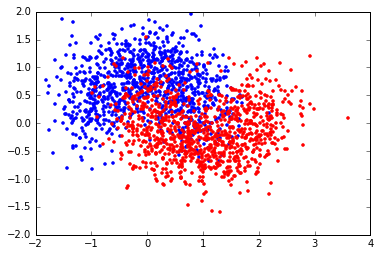

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=2000, noise=0.4)
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.');
plt.plot(data[label==1,0], data[label==1,1],'r.');

In [2]:
# single class example
pol = Poly(data,label, n_folds=5, verbose=1, feature_selection=False)
scores= pol.run()


INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Loading _models/Multilayer Perceptron_1.p
INFO:polyssifier.polyssifier:Multilayer Perceptron    :  Train 0.85, 4.23 sec
INFO:polyssifier.polyssifier:Loading _models/Nearest Neighbors_1.p
INFO:polyssifier.polyssifier:Nearest Neighbors        :  Train 0.82, 0.00 sec
INFO:polyssifier.polyssifier:Loading _models/SVM_1.p
INFO:polyssifier.polyssifier:SVM                      :  Train 0.85, 0.01 sec
INFO:polyssifier.polyssifier:Loading _models/Linear SVM_1.p
INFO:polyssifier.polyssifier:Linear SVM               :  Train 0.82, 0.00 sec
INFO:polyssifier.polyssifier:Loading _models/Decision Tree_1.p
INFO:polyssifier.polyssifier:Decision Tree            :  Train 0.79, 0.00 sec
INFO:polyssifier.polyssifier:Loading _models/Random Forest_1.p
INFO:polyssifier.polyssifier:Random Forest            :  Train 0.82, 0.02 sec
INFO:polyssifi

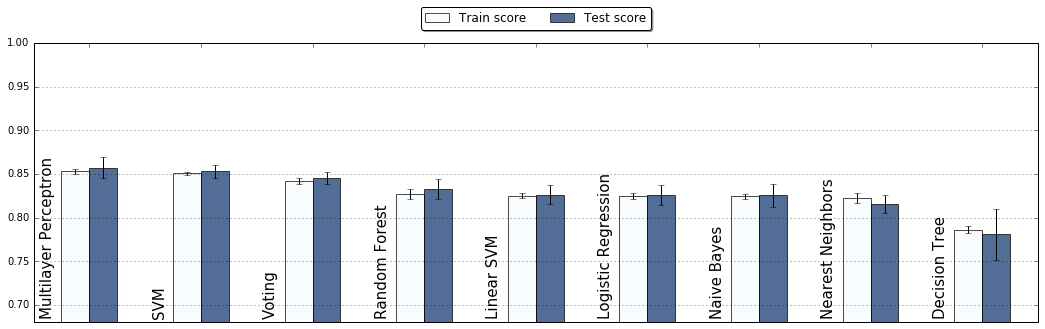

In [3]:
pol.plot()

In [4]:
for key, val in pol.confusions.items():
    print(key)
    print(val)


Voting
[[ 860.  140.]
 [ 169.  831.]]
Multilayer Perceptron
[[ 858.  142.]
 [ 144.  856.]]
Decision Tree
[[ 790.  210.]
 [ 228.  772.]]
SVM
[[ 858.  142.]
 [ 152.  848.]]
Random Forest
[[ 859.  141.]
 [ 194.  806.]]
Naive Bayes
[[ 828.  172.]
 [ 177.  823.]]
Linear SVM
[[ 827.  173.]
 [ 174.  826.]]
Nearest Neighbors
[[ 824.  176.]
 [ 193.  807.]]
Logistic Regression
[[ 825.  175.]
 [ 173.  827.]]


In [5]:
#pol.predictions.head()
pol.predictions.sort_index(inplace=True)

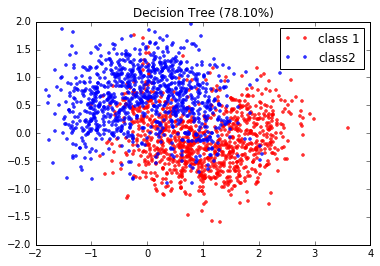

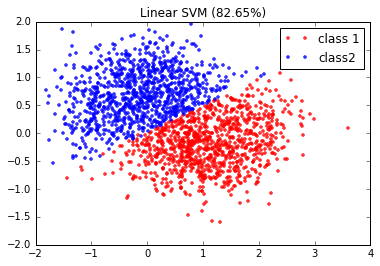

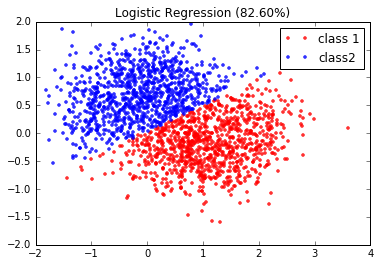

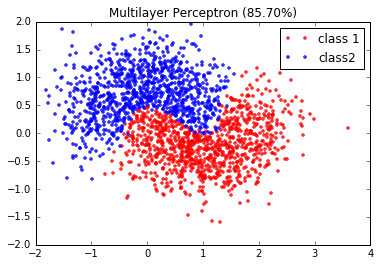

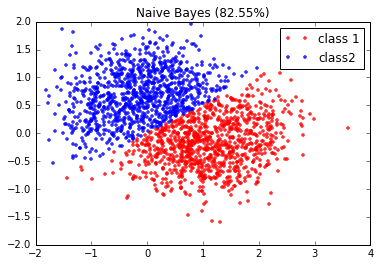

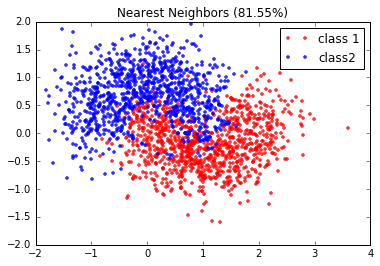

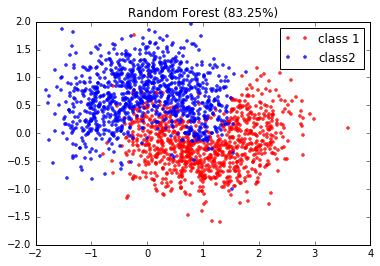

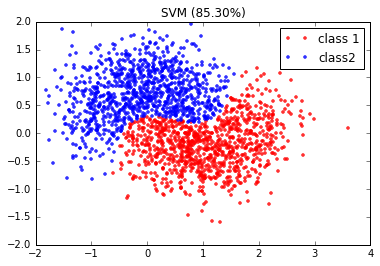

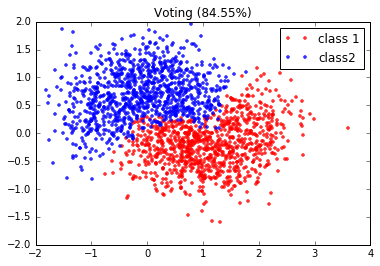

In [6]:
for key, pred in pol.predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(pol.scores[key]['test']) ))